## Non-linear filters

Another class of filters does not use convolution to filter the image but does some other type of operation on small neighborhoods of the image. For example it can calculate the median value of each 3x3 sub-region in the image. This is extremely useful if our image has pixels that are "dead" or have extremely large values.

For purpose of illustration, we can artificially create such an image using `skimage` or `scipy`.

In [1]:
import scipy
import scipy.ndimage as ndi 
import numpy as np
import skimage
from skimage import io, filters
from skimage import data, img_as_float
import matplotlib.pyplot as plt
import os
import math

### Noise
Let us generate some noisy images

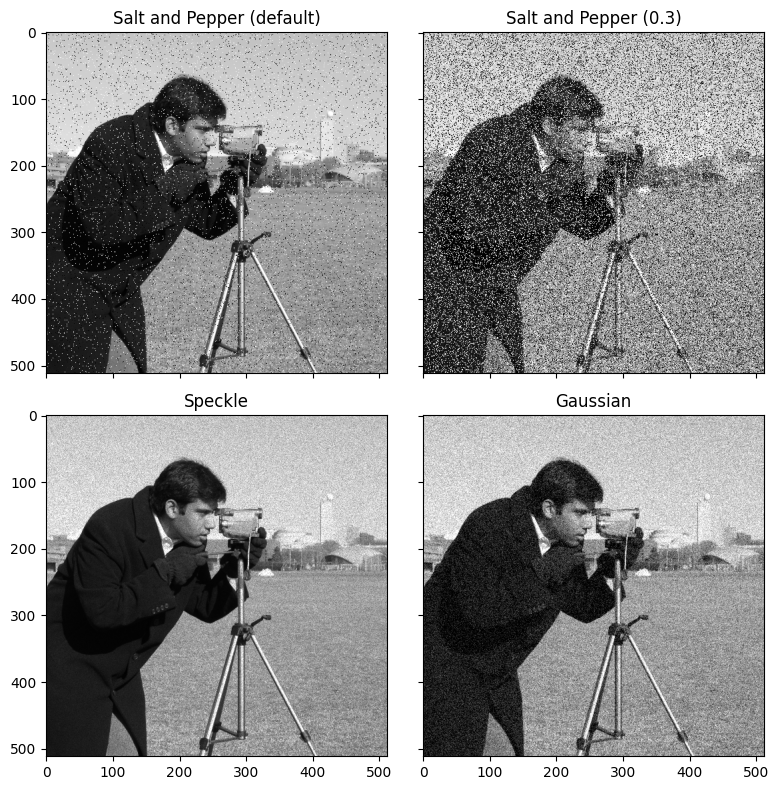

In [2]:
import skimage.util.noise as noise 
img = data.camera()
img_sp1 = noise.random_noise(img,mode='s&p') 
img_sp2 = noise.random_noise(img,mode='s&p',amount=0.3)
img_speck = noise.random_noise(img,'speckle') 
img_gauss = noise.random_noise(img,'gaussian')

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex = True, sharey = True) #figsize controls relative size of images
ax = ax.ravel()

ax[0].imshow(img_sp1, cmap='gray', vmin = 0, vmax = 1) 
ax[0].set_title('Salt and Pepper (default)')
ax[1].imshow(img_sp2, cmap='gray', vmin = 0, vmax = 1)
ax[1].set_title('Salt and Pepper (0.3)')
ax[2].imshow(img_speck, cmap='gray', vmin = 0, vmax = 1) 
ax[2].set_title('Speckle')
ax[3].imshow(img_gauss, cmap='gray', vmin = 0, vmax = 1) 
ax[3].set_title('Gaussian')


# prevent overlap of y-axis labels
plt.tight_layout()

Non-linear filters can be implemented using `rank_filter` method in `scipy`. A non-linear filter is obtained by a non-linear function of the grayscale values in the mask. Simple examples are maximum filter, which has as its output the maximum value under the mask, and the corresponding minimum filter, which has as its output the minimum value under the mask. Another one that we have previously described is the median filter, which has as its output the median value under the mask. Let us see the output of all these filters on the cameraman image.


In [3]:
?ndi.rank_filter

Signature:
ndi.rank_filter(
    input,
    rank,
    size=None,
    footprint=None,
    output=None,
    mode='reflect',
    cval=0.0,
    origin=0,
)
Docstring:
Calculate a multidimensional rank filter.

Parameters
----------
input : array_like
    The input array.
rank : int
    The rank parameter may be less than zero, i.e., rank = -1
    indicates the largest element.
size : scalar or tuple, optional
    See footprint, below. Ignored if footprint is given.
footprint : array, optional
    Either `size` or `footprint` must be defined. `size` gives
    the shape that is taken from the input array, at every element
    position, to define the input to the filter function.
    `footprint` is a boolean array that specifies (implicitly) a
    shape, but also which of the elements within this shape will get
    passed to the filter function. Thus ``size=(n,m)`` is equivalent
    to ``footprint=np.ones((n,m))``.  We adjust `size` to the number
    of dimensions of the input array, so that, 

Text(0.5, 0.98, 'Impact of non-linear filters on the cameraman image')

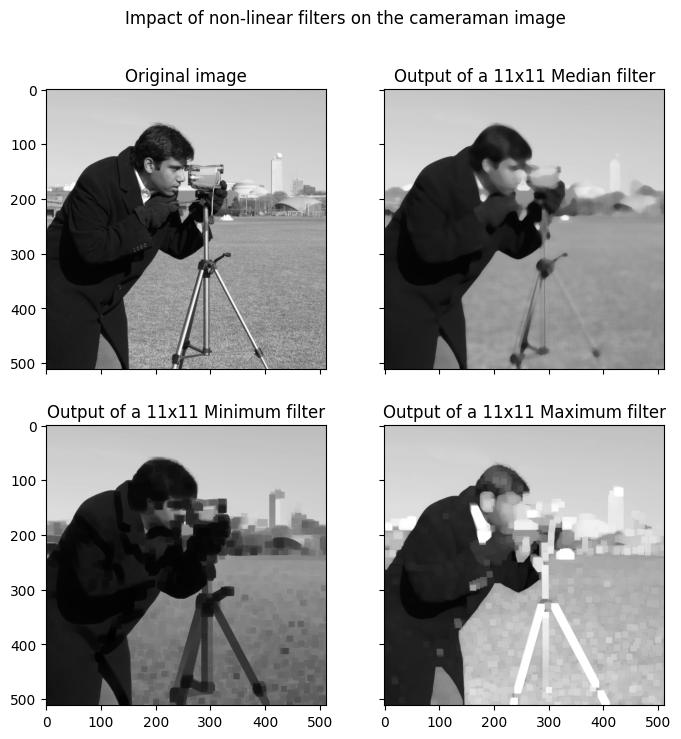

In [4]:
img= img_as_float(img)
imgmedian = ndi.rank_filter(img,60,size=(11,11)) #60 is the mid-point of a 11 x 11 filter (0 through 120 values)
imgmin = ndi.rank_filter(img,0,size=(11,11))
imgmax = ndi.rank_filter(img,120,size=(11,11))

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex = True, sharey = True) #figsize controls relative size of images
ax = ax.ravel()

ax[0].imshow(img, cmap='gray', vmin = 0, vmax = 1) 
ax[0].set_title("Original image")
ax[1].imshow(imgmedian, cmap='gray', vmin = 0, vmax = 1) 
ax[1].set_title("Output of a 11x11 Median filter")

ax[2].imshow(imgmin, cmap='gray', vmin = 0, vmax = 1)
ax[2].set_title("Output of a 11x11 Minimum filter")

ax[3].imshow(imgmax, cmap='gray', vmin = 0, vmax = 1) 
ax[3].set_title("Output of a 11x11 Maximum filter")

fig.suptitle("Impact of non-linear filters on the cameraman image")


Note the difference in output of these three non-linear filters. But these were applied on the camera image which did not have any noise. How do these filter responses change if the filter size (currently 11 x 11) is changed?

Let us assess the impact of changing the size of the median filter when applied on a noisy image.

Text(0.5, 0.98, 'Impact of median filters on Salt & Pepper cameraman images')

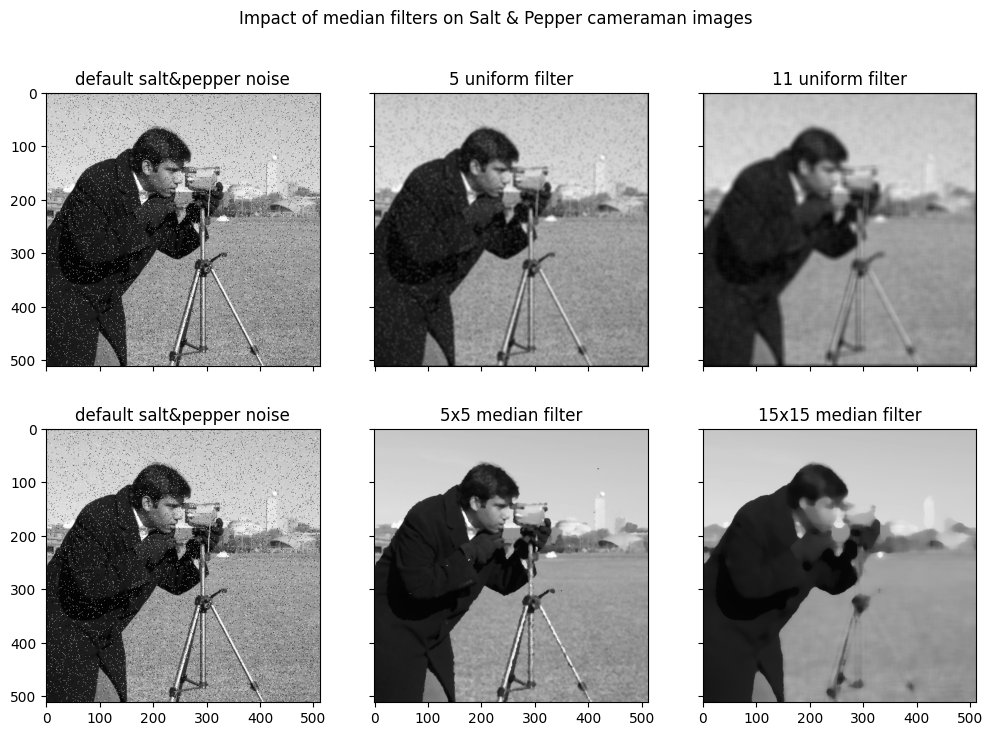

In [14]:
imgmedian_11_sp1 = ndi.rank_filter(img_sp1,112,size=(15,15)) #112 is the mid-point of a 15 x 15 filter (0 through 225 values)
imgmedian_5_sp1 = ndi.rank_filter(img_sp1,12,size=(5,5)) #12 is the mid-point of a 5 x 5 filter (0 through 24 values)
imgmedian_11_sp2 = ndi.rank_filter(img_sp2,112,size=(15,15)) 
imgmedian_5_sp2 = ndi.rank_filter(img_sp2,12,size=(5,5))

imgUniform_11_sp1 = ndi.uniform_filter(img_sp1, 11, mode='constant')
imgUniform_5_sp1 = ndi.uniform_filter(img_sp1, 5, mode='constant')




fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), sharex = True, sharey = True) #figsize controls relative size of images
ax = ax.ravel()

ax[0].imshow(img_sp1, cmap='gray', vmin = 0, vmax = 1) 
ax[0].set_title("default salt&pepper noise")

ax[1].imshow(imgUniform_5_sp1, cmap='gray', vmin = 0, vmax = 1) 
ax[1].set_title("5 uniform filter")

ax[2].imshow(imgUniform_11_sp1, cmap='gray', vmin = 0, vmax = 1) 
ax[2].set_title("11 uniform filter")


ax[3].imshow(img_sp1, cmap='gray', vmin = 0, vmax = 1) 
ax[3].set_title("default salt&pepper noise")

ax[4].imshow(imgmedian_5_sp2, cmap='gray', vmin = 0, vmax = 1)
ax[4].set_title("5x5 median filter")

ax[5].imshow(imgmedian_11_sp2, cmap='gray', vmin = 0, vmax = 1) 
ax[5].set_title("15x15 median filter")

fig.suptitle("Impact of median filters on Salt & Pepper cameraman images")



The added noise is efficiently removed, and a small filter size is sufficient. As the filter size increases, objects with bigger sizes get filtered as well, such as the
camera tripod. The median filter also preserves borders (hence the word edge-preserving). 

Why does the median filter work in removing Salt and Pepper noise? Because, Salt and Pepper noise is located only on a
few pixels that the filter is processing. The median filter will ignore the noisy pixels, for they will appear
as outliers; thus, it will not change significantly the median of a group of
local pixels, in contrast to what a moving average filter would do.

## Part A (3 points)

Apply a `uniform filter` (which is a linear filter) to each of the [noisy image above](#Noise) and observe the response. How does the response change as the size of the `uniform filter` increases? Which noise is removed most effectively?

YOUR ANSWER HERE
The uniform filter smooths out noisy rather than erases them. A bigger size filter smooths out noise further the bigger it is.

## Removing Gaussian Noise
A strategy to remove Gaussian noise is provided below. This is applicable when several images of the same object can be taken such as in astronomy or in microscopy. Due to sensor noise, each image is corrupted by Gaussian noise. In such cases, the algorithm below works well.

![Cleaning Gaussian Noise](cleaningGaussianNoise.jpeg)

## Part B (10 points) 
Apply the algorithm given above to remove Gaussian noise from images in the directory `noisyImages`. It will require you to iterate over all images. Use `glob.glob(dir)` to extract list of `files` in `dir`. To store all images in a numpy array, it may be helpful to extract shape of any one image in the directory to be able to specify the overall size of the numpy array .

In [30]:
import glob

def removeGaussianNoise(imgDir = 'wfc3_uvis'):
    
    dirname = os.path.join(os.getcwd(),'noisyImages',imgDir)
    numfiles = len(glob.glob(dirname + "/*.png"))
    print(dirname, 'Number of files = ' + str(numfiles), sep = '\n')
    
    imageArray = np.array([])

    for img in glob.glob(dirname + "/*.png"):
        imageExtract = io.imread(img) 
        imageArray.a





removeGaussianNoise()


c:\Code\cs479\lab3\lab3\lab4\noisyImages\wfc3_uvis
Number of files = 10
[[[  2 176   0]
  [  0   0 226]
  [  0   0 226]
  ...
  [  0  60  94]
  [  0   0   0]
  [  0   0   0]]

 [[ 20 174   0]
  [  0   0   0]
  [  8   0   0]
  ...
  [ 64  56  94]
  [  0  52   0]
  [  0  52  90]]

 [[ 32   0   0]
  [  0   0 236]
  [  2   0 232]
  ...
  [  0  56  92]
  [ 60  54   0]
  [ 60  54  94]]

 ...

 [[ 50   0   0]
  [ 58 214 244]
  [  0 224 236]
  ...
  [  0   0 124]
  [  2   0   0]
  [  8   0   0]]

 [[  0   0 228]
  [  0   0   0]
  [ 54 210 224]
  ...
  [ 12   0 130]
  [  0   0   0]
  [  0  68 130]]

 [[138   0   0]
  [150   0   0]
  [118   0   0]
  ...
  [ 16   0   0]
  [ 18   0   0]
  [  0   0   0]]]
[[[  0   0   0]
  [  4   0 226]
  [  0   0   0]
  ...
  [ 72  60  94]
  [  0  56  96]
  [ 70  56  96]]

 [[ 20   0 234]
  [ 42   0 234]
  [  8   0 236]
  ...
  [ 64   0  94]
  [  0  52  90]
  [ 62   0   0]]

 [[ 32   0   0]
  [  0   0 236]
  [  2   0 232]
  ...
  [  0  56  92]
  [  0   0  94]
  [ 

In [ ]:
from numpy.random import default_rng

#Helper function to display some images randomly from the directory imgDir, 
#along with the clean image obtained by calling removeGaussianNoise
def showImages(imgDir, cleanImg):
    rng = default_rng()

    #Select some images randomly from imgDir and show them along with cleanImg
    dirname = os.path.join(os.getcwd(),'noisyImages',imgDir)
    numfiles = len(glob.glob(dirname + "/*.png"))
    files = []
    for file in glob.glob(dirname + "/*.png"):
        files.append(file)

    x = rng.choice(numfiles, size=3, replace=False)
    print("random indices:", x)
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharex = True, sharey = True) 
    ax = ax.ravel()
    for i in range(3):
        img = io.imread(files[x[i]])
        ax[i].imshow(img)

    ax[3].imshow(cleanImg)
    plt.tight_layout()


In [ ]:
imgDir = 'wfc3_uvis'
cleanImg = removeGaussianNoise(imgDir)

assert cleanImg.shape[0] == 346
assert math.isclose(cleanImg.mean(), 0.25733878625)

showImages(imgDir, cleanImg)
print("Success!")

In [ ]:
imgDir = 'orion'
cleanImg = removeGaussianNoise(imgDir)

assert cleanImg.shape[0] == 600
assert math.isclose(cleanImg.mean(), 0.23500850036)

showImages(imgDir, cleanImg)
print("Success!")

## Part C (5 points) 

Check out the description of the problem of Pesky Tourist [here](http://nifty.stanford.edu/2014/nicholson-the-pesky-tourist/student.html). You may see the images in the directory `ThePeskyTourist` provided as a part of this lab. Your task is to remove the Pesky Tourist from the images! The algorithm is very similar to above (that removes Gaussian noise) but taking a median instead of taking an average.

In [ ]:
def removePeskyTourist():
    
    imgDir = 'ThePeskyTourist'
    dirname = os.path.join(os.getcwd(),imgDir)
    numfiles = len(glob.glob(dirname + "/*.png"))
    print(dirname, 'Number of files = ' + str(numfiles), sep = '\n')
    
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
cleanImg = removePeskyTourist()

assert cleanImg.shape[0] == 557
assert math.isclose(cleanImg.mean(), 0.52157602355)

print("Success!")



In [ ]:
from numpy.random import default_rng

rng = default_rng()

#Select some images randomly from imgDir and show them along with cleanImg
dirname = os.path.join(os.getcwd(),'ThePeskyTourist')
numfiles = len(glob.glob(dirname + "/*.png"))
files = []
for file in glob.glob(dirname + "/*.png"):
    files.append(file)
    
x = rng.choice(numfiles, size=3, replace=False)
print(x)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharex = True, sharey = True) 
ax = ax.ravel()
for i in range(3):
    img = io.imread(files[x[i]])
    ax[i].imshow(img)

ax[3].imshow(cleanImg)
plt.tight_layout()


## Bilateral filters
Linear filters (and many non-linear filters) are **domain filters**, where the weights attached to
each neighboring pixel depend on only the position of those pixels (weights change as the position changes). One of the *domain filter* is the *Spatial Gaussian* (from the video). 

Another family of filters are the **range filters**, where the weights depend on the relative difference between pixel values (i.e. weights only depend on the relative difference, not on position). One of the *range filter* is the *Brightness Gaussian* (from the video). 

The idea of the **bilateral filter** is to use both domain and range filtering. That is, combining *Spatial Gaussian* and *Brightness Gaussian* with sigma σ_d and σ_r, respectively. For each pixel in the image, a range filter maps the similarity of pixels in that neighborhood. That filter is then convolved with the domain filter. 

By adjusting the sigmas, it is possible to obtain
varying amounts of blurring, **as well as keeping the edges sharp**. In other words, a bilateral filter is an edge-preserving and noise reducing filter. It averages pixels based on their spatial closeness (used by domain filter) and radiometric similarity (used by range filter).

In [ ]:
?skimage.restoration.denoise_bilateral

In [ ]:
from skimage.restoration import denoise_bilateral


img = data.camera()
img_sp1 = noise.random_noise(img,mode='s&p') 
img_speck = noise.random_noise(img,'speckle') 
img_gauss = noise.random_noise(img,'gaussian')
#To make sure bilateral denoising works, make sure image is converted to float

#sigma_color is the sigma for range filter (σ_r) 
#sigma_spatial is the sigma for domain filter (σ_d)
img_db1 = denoise_bilateral(img, sigma_color=0.1, sigma_spatial=5) 
img_db2 = denoise_bilateral(img_sp1, sigma_color=0.1, sigma_spatial=5) 
img_db3 = denoise_bilateral(img_speck, sigma_color=0.1, sigma_spatial=5) 
img_db4 = denoise_bilateral(img_gauss, sigma_color=0.1, sigma_spatial=5) 

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex = True, sharey = True) #figsize controls relative size of images
ax = ax.ravel()

ax[0].imshow(img_db1, cmap='gray', vmin = 0, vmax = 1) 
ax[1].imshow(img_db2, cmap='gray', vmin = 0, vmax = 1) 
ax[2].imshow(img_db3, cmap='gray', vmin = 0, vmax = 1)
ax[3].imshow(img_db4, cmap='gray', vmin = 0, vmax = 1) 

fig.suptitle("Impact of bilateral filters on differnt noisy images")
plt.tight_layout()


## Part D (3 points)

Update the sigmas (σ_d and σ_r) and observe the impact of Bilateral-filtering. On what kind of noise is Bilateral filtering most effective? On what kind of noise it is least effective? 

Change the image used above and verify your claim is general and not just for the cameraman image. Clearly specify in your response below, which images you used and what parameter tuning on sigma (σ_d and σ_r) did you do to reach your conclusion. 

YOUR ANSWER HERE

### Structuring element or "footprint"

Until now we have used the method `ndi.rank_filter` for various purposes (such as computing the median, maximum, minimum y providing a different `rank`). These non-linear operations can also be directly computed using methods in `skimage.filters.rank` library. These either operate on a default region (such as a 3x3 square region in case of a median filter) but we can specify any other shape or *footprint*. For example, we can use a Numpy array to construct the footprint ourselves or  we can use pre-made shapes that are available directly in scikit-image such as a disk with a certain radius. Let us try these out!
 

In [ ]:
img = data.camera()
image_noisy = noise.random_noise(img,mode='s&p') 

filtered_median_default = skimage.filters.median(image_noisy)

#Construct footprint using numpy array
footprint = np.ones((7,7))
filtered_median_square = skimage.filters.median(image_noisy, footprint=footprint)

#Construct footprint using a disk available in skimage
footprint = skimage.morphology.disk(5)
filtered_median_disk = skimage.filters.median(image_noisy, footprint=footprint)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex = True, sharey = True) #figsize controls relative size of images
ax = ax.ravel()

ax[0].imshow(image_noisy, cmap='gray', vmin = 0, vmax = 1) 
ax[0].set_title("Noisy image")
ax[1].imshow(filtered_median_default, cmap='gray', vmin = 0, vmax = 1) 
ax[1].set_title("Output of a default 3x3 Median filter")

ax[2].imshow(filtered_median_square, cmap='gray', vmin = 0, vmax = 1)
ax[2].set_title("Output of a 7x7 square footprint")

ax[3].imshow(filtered_median_disk, cmap='gray', vmin = 0, vmax = 1) 
ax[3].set_title("Output of a 5x5 disk footprint")

fig.suptitle("Impact of median filters with different footprint")


As we will see next, the ability to specify footprints come in very handy during the so-called morphological operations.

## Morphological operations

Filtering images is at the core of image processing. As we have seen, the idea is to use a small image that travels across a larger image and does some operation on each sub-region of this larger image. Multiple properties of the *little travelling square* can change:
- the pixel values of the square can be anything. For example it's common to have a 2D gaussian for smoothing the image
- the size and shape of the square can change
- the operation done by the square does not have to be a simple multiplication-addition (convolution). It can also be another function like a median for example, which we have seen above.

Filters can be applied to regular images, as well as to masks (binary images) and are often used to clean-up an image or to detect object. When working with masks, one can use another class of filters, that just turn pixels ON and OFF depending on their surroundings. These are called morphological filters. `scikit-image` implements these filters in ```skimage.morphology``` and we are going to look at a few.

The simplest morphological filters to understand are the `erosion` and `dilation` filters. As their name indicate, these filters either shrink or enlarge ON objects. The size and shape of the filters, specify what region is considered around objects to shrink or enlarge them. We use here again the ```footprint``` argument to specify such structuring elements.

Let's load one of the images we have seen in a previous lab and create a simple mask using an Otsu threshold:

In [ ]:
image_stack = skimage.io.imread('46658_784_B12_1.tif')
image_nuclei = image_stack[1250:1750,300:800,2]

In [ ]:
#plt.subplots(figsize=(10,10))
plt.imshow(image_nuclei, cmap = 'gray')

In [ ]:
mask = image_nuclei > skimage.filters.threshold_otsu(image_nuclei)

plt.imshow(mask, cmap = 'gray');

We can just specify the influence region as a Numpy array. For example a square of size 5:

In [ ]:
influence_region = np.ones((5,5))

In [ ]:
eroded = skimage.morphology.binary_erosion(mask, footprint=influence_region)

In [ ]:
plt.imshow(eroded, cmap = 'gray');

We can `erode` even more:

In [ ]:
influence_region = np.ones((10,10))

eroded = skimage.morphology.binary_erosion(mask, footprint=influence_region)

plt.imshow(eroded, cmap = 'gray');

We can do the reverse and `dilate` our image:

In [ ]:
influence_region = np.ones((10,10))

dilated = skimage.morphology.binary_dilation(mask, footprint=influence_region)

plt.imshow(dilated, cmap = 'gray');

How are these operators useful in image processing ? Let's again generate a noisy image.

In [ ]:
image_noisy = skimage.util.random_noise(image_nuclei, mode='s&p')
plt.imshow(image_noisy, cmap = 'gray');

Our mask would look like this:

In [ ]:
mask = image_noisy > skimage.filters.threshold_otsu(image_noisy)

plt.imshow(mask, cmap = 'gray');

We can now fill the little holes in the nuclei with a small dilation:

In [ ]:
influence_region = np.ones((2,2))

step1 = skimage.morphology.binary_dilation(mask, footprint=influence_region)

plt.imshow(step1, cmap = 'gray');

And erode again to put the nuclei back to their original size:

In [ ]:
influence_region = np.ones((2,2))

step2 = skimage.morphology.binary_erosion(step1, footprint=influence_region)

plt.imshow(step2, cmap = 'gray');

We still have some noise. So we can do another round where we *first* erode the image (to remove dust) and dilate it again to recover nuclei of correct size:

In [ ]:
influence_region = np.ones((2,2))

step3 = skimage.morphology.binary_erosion(step2, footprint=influence_region)
step4 = skimage.morphology.binary_dilation(step3, footprint=influence_region)

plt.imshow(step4, cmap = 'gray');

The combination of erosion and dilation is widely used and depending on the order of operation have specific names: opening, closing. For example, the ```binary_closing``` filter first applies a dilation and then an erosion:

In [ ]:
image_closed = skimage.morphology.binary_closing(mask, footprint=influence_region)
plt.imshow(image_closed, cmap='gray');

For example, the ```binary_opening``` filter first applies an erosion and then a dilation:

In [ ]:
image_open = skimage.morphology.binary_opening(mask, footprint=influence_region)
plt.imshow(image_open, cmap='gray');

Other morphological operations can be employed for flood filling, removing holes, finding maxima, skeleton etc. For example, we can use `ndi.binary_fill_holes` from the `scipy` package to fill holes.

In [ ]:
?ndi.binary_fill_holes

In [ ]:
image_fill = ndi.binary_fill_holes(image_open, skimage.morphology.disk(3))
plt.imshow(image_fill, cmap='gray');

What would be the result if we had closed first and then filled the holes?

In [ ]:
image_fill = ndi.binary_fill_holes(image_closed, skimage.morphology.disk(3))
plt.imshow(image_fill, cmap='gray');

Next let us load back the image again and visualize all three components. The Red component corresponds to the long "silky" structures; the Blue component corresponds to the nuclei (as we have seen above); the Green component reflects the strength or the intensity of the signal.

In [ ]:
image_stack = skimage.io.imread('46658_784_B12_1.tif')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex = True, sharey = True) #figsize controls relative size of images
ax = ax.ravel()

ax[0].imshow(image_stack) 
ax[0].set_title("Noisy image")
ax[1].imshow(image_stack[:,:,0], cmap='gray') 
ax[1].set_title("Red channel")

ax[2].imshow(image_stack[:,:,1], cmap='gray')
ax[2].set_title("Green channel")

ax[3].imshow(image_stack[:,:,2], cmap='gray') 
ax[3].set_title("Blue channel")

plt.tight_layout()


## Part E (4 points)
We will attempt to identify the individual nuclei (from the blue channel). But, first, let's create a mask of the nuclei and clean it up with morphological operations. Complete the function below by implementing certain morphological operations.

In [ ]:
def cleanImage(image_nuclei):
    '''
    Perform the following operations
        1. Apply a median filter on the input image with a disk of size 5
        2. Create a mask using otsu threshold, keeping everything greater than the threshold
        3. Perform a closing, hole-filling operation, both with a disk of size 5
        4. Return the resulting image
    '''
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:

image_nuclei = image_stack[:,:,2]#blue channel in RGB
mask_nuclei = cleanImage(image_nuclei)

plt.subplots(figsize=(10,10))
plt.imshow(mask_nuclei, cmap = 'gray');

assert math.isclose(mask_nuclei.mean(), 0.13012480735778)
print("Success!")

## Labelling

In order to measure objects in the image separately, we first need to label them individually. For that we can just use the ```skimage.morphology.label()``` function which looks for independent groups of white pixels and assigns them integer numbers:

In [ ]:
my_labels = skimage.morphology.label(mask_nuclei) #0 label is for the background
print(my_labels.min(), my_labels.max())

The label map shows that numbers are assigned from top to bottom in the image:

In [ ]:
plt.subplots(figsize=(10,10))
plt.imshow(my_labels);

## Region properties

Now that we have each region labeled with a different number we can use the ```skimage.measure.regionprops_table()``` function, which takes such as label map and analyzes the geometric properties of each region. We have to specifiy which ```properties``` we want to use. For example the ```area``` and ```labels```:

In [ ]:
my_regions = skimage.measure.regionprops_table(my_labels, properties=('label','area'))

The output is a dictionary of all properties that we asked to get out. Recall, dictionaries are data structure that contain pairs of elements: keys like ```label``` and ```area``` and a *content* for each key, here two Numpy arrays:

In [ ]:
my_regions

## Filtering information

Obviously, we had some "bad segmentations", i.e. some fragments remaining from the processing that are not actual nuclei. Can you visually identify them for the mask above?

We can easily filter those out for example based on size using Numpy logical indexing:

In [ ]:
my_regions['area']

We create a logical array by setting a condition on one dictionary entry:

In [ ]:
selected = my_regions['area'] > 100
selected

And then use it for logical indexing:

In [ ]:
my_regions['area'][selected]

## Part F (5 points)
Given a mask, find and remove regions whose area is less than a threshold.

In [ ]:
def removeSmallRegionsFromMask(mask, thresh):
    '''
    Labels independent regions in the mask.
    Finds those regions whose area is less than thresh.
    Creates a new labeled image in which these regions are removed (by setting their value to 0) 
    Returns the original and new labeled image in a tuple
    '''

    # YOUR CODE HERE
    raise NotImplementedError()


In [ ]:
#remove regions with area < 1000
orig_labels, new_labels = removeSmallRegionsFromMask(mask_nuclei, 1000)

orig_nonzero = np.count_nonzero(orig_labels)
new_nonzero = np.count_nonzero(new_labels)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharex = True, sharey = True) #figsize controls relative size of images
ax[0].imshow(orig_labels)
ax[1].imshow(new_labels)

assert orig_nonzero == 545783
assert new_nonzero == 544894
print("Success!")


In [ ]:
#remove regions with area < 25000
orig_labels, new_labels = removeSmallRegionsFromMask(mask_nuclei, 25000)

orig_nonzero = np.count_nonzero(orig_labels)
new_nonzero = np.count_nonzero(new_labels)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharex = True, sharey = True) #figsize controls relative size of images
ax[0].imshow(orig_labels)
ax[1].imshow(new_labels)

assert orig_nonzero == 545783
assert new_nonzero == 474359
print("Success!")


## Recovering image intensity information

In what we did above, we only recovered information about our mask. However often we want to obtain information on pixel values of the **original** image. For example, "what is the average intensity of each nucleus?"

Luckily ```regionprops_table``` allows us to pass as additional argument ```intensity_image``` the image we want to use to quantify intensity. Then we can for example add as property to extract the ```mean_intensity```:

In [ ]:
image_signal = image_stack[:,:,1]#green channel in RGB

In [ ]:
my_regions = skimage.measure.regionprops_table(
    my_labels,intensity_image=image_signal, properties=('label','area','mean_intensity'))

Now we have access to additional parameters. For example the mean_intensity in each nucleus:

In [ ]:
my_regions

Now that we have this information, we can of course, plot it (for example we can produce a histogram of mean nuclei intensities) or use it for removing certain objects with mean intensities below/above a certain threshold. 

In [ ]:
plt.hist(my_regions['mean_intensity']);

## Challenge question. 

Process the mask below using morphological operations to label the 24 coins separately. Example output:

![output](coins_challenge.png)

In [ ]:
coins = data.coins()
val = filters.threshold_otsu(coins)
mask = coins > val
plt.imshow(mask, cmap = 'gray')